# 4 Evaluation Metrics for Classification
In the previous session we trained a model for predicting churn. How do we know if it's good?

## 4.1 Evaluation metrics: session overview

* Dataset: Cynthia Erivo defying gravity
* https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv

Metric - function that compares the predictions with the actual values and outputs a single number that tells how good the predictions are

In [1]:


import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt



In [2]:


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression



In [3]:
file = 'data-week-3.csv '
if os.path.exists(file):
    pass
else:
    data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'
    !wget $data -O data-week-3.csv  
    

--2025-10-20 15:08:26--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘data-week-3.csv’

data-week-3.csv     100%[===================>] 954.59K  --.-KB/s    in 0.02s   

2025-10-20 15:08:26 (38.7 MB/s) - ‘data-week-3.csv’ saved [977501/977501]



In [4]:
df = pd.read_csv('data-week-3.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [5]:


df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']



In [6]:


numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]



In [7]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(max_iter=2300)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2300
,multi_class,'deprecated'


In [8]:


val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()



np.float64(0.8034066713981547)

## 4.2 Accuracy and dummy model

* Evaluate the model on different thresholds
* Check the accuracy of dummy baselines

In [9]:
len(y_val)

1409

In [10]:
1132/1409

0.8034066713981547

In [11]:
(y_val == churn_decision).mean()

np.float64(0.8034066713981547)

In [12]:
thresholds = np.linspace(0,1,21)
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [13]:
scores = []
for t in thresholds:
    churn_decision = (y_pred >= t)
    score = (y_val == churn_decision).mean()
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.513
0.10 0.608
0.15 0.661
0.20 0.703
0.25 0.734
0.30 0.758
0.35 0.765
0.40 0.782
0.45 0.791
0.50 0.803
0.55 0.801
0.60 0.796
0.65 0.789
0.70 0.766
0.75 0.742
0.80 0.729
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


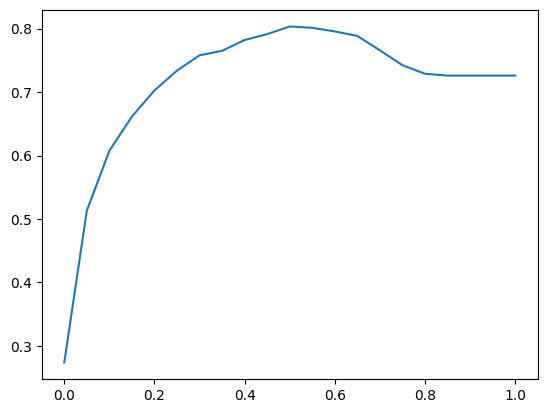

In [14]:
plt.plot(thresholds, scores)

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
accuracy_score(y_val, y_pred >= 0.5)

0.8034066713981547

In [17]:
scores = []
for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.513
0.10 0.608
0.15 0.661
0.20 0.703
0.25 0.734
0.30 0.758
0.35 0.765
0.40 0.782
0.45 0.791
0.50 0.803
0.55 0.801
0.60 0.796
0.65 0.789
0.70 0.766
0.75 0.742
0.80 0.729
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


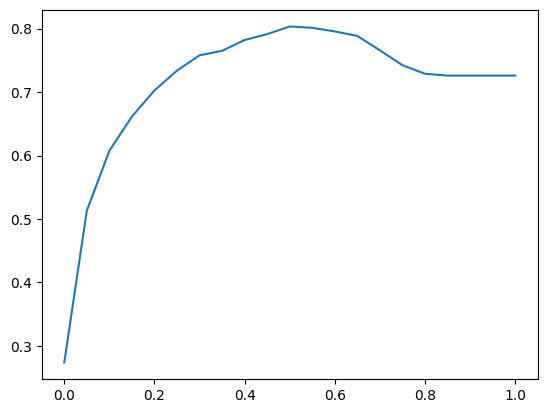

In [18]:
plt.plot(thresholds, scores)

## 4.3 Confusion table

* Different types of errors and correct decisions
* Arranging them in a table

In [19]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [20]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [21]:
true_positive = (predict_positive & actual_positive).sum()
true_negative = (predict_negative & actual_negative).sum()

In [22]:
false_positive = (predict_positive & actual_negative).sum()
false_negative = (predict_negative & actual_positive).sum()

In [23]:
confusion_matrix = np.array([
    [true_negative, false_positive],
    [false_negative, true_positive]
])
confusion_matrix

array([[920, 103],
       [174, 212]])

In [24]:
(confusion_matrix/confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

## 4.4 Precision and Recall

In [25]:
(true_positive + true_negative)/(true_positive+true_negative + false_positive + false_negative)

np.float64(0.8034066713981547)

In [27]:
p = true_positive /(true_positive+false_positive)
p

np.float64(0.6730158730158731)

In [29]:
r = true_positive /(true_positive+false_negative)
r

np.float64(0.5492227979274611)

## 4.5 ROC Curves

### TPR and FRP

In [30]:
tpr = true_positive / (true_positive+false_negative)
tpr

np.float64(0.5492227979274611)

In [31]:
fpr = false_positive / (false_positive + true_negative)
fpr

np.float64(0.10068426197458455)

In [34]:
thresholds = np.linspace(0,1,101)

scores = []

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    true_positive = (predict_positive & actual_positive).sum()
    true_negative = (predict_negative & actual_negative).sum()

    false_positive = (predict_positive & actual_negative).sum()
    false_negative = (predict_negative & actual_positive).sum()

    scores.append((t, true_positive, false_positive, false_negative, true_negative))

scores

[(np.float64(0.0), np.int64(386), np.int64(1023), np.int64(0), np.int64(0)),
 (np.float64(0.01), np.int64(385), np.int64(894), np.int64(1), np.int64(129)),
 (np.float64(0.02), np.int64(383), np.int64(804), np.int64(3), np.int64(219)),
 (np.float64(0.03), np.int64(382), np.int64(749), np.int64(4), np.int64(274)),
 (np.float64(0.04), np.int64(382), np.int64(709), np.int64(4), np.int64(314)),
 (np.float64(0.05), np.int64(378), np.int64(678), np.int64(8), np.int64(345)),
 (np.float64(0.06), np.int64(377), np.int64(653), np.int64(9), np.int64(370)),
 (np.float64(0.07), np.int64(374), np.int64(623), np.int64(12), np.int64(400)),
 (np.float64(0.08), np.int64(371), np.int64(588), np.int64(15), np.int64(435)),
 (np.float64(0.09), np.int64(370), np.int64(557), np.int64(16), np.int64(466)),
 (np.float64(0.1), np.int64(366), np.int64(533), np.int64(20), np.int64(490)),
 (np.float64(0.11), np.int64(365), np.int64(512), np.int64(21), np.int64(511)),
 (np.float64(0.12), np.int64(361), np.int64(497), 

In [38]:
columns = ['thresholds', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,thresholds,tp,fp,fn,tn
0,0.00,386,1023,0,0
1,0.01,385,894,1,129
2,0.02,383,804,3,219
3,0.03,382,749,4,274
4,0.04,382,709,4,314
...,...,...,...,...,...
96,0.96,0,0,386,1023
97,0.97,0,0,386,1023
98,0.98,0,0,386,1023
99,0.99,0,0,386,1023


In [41]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp+df_scores.fn)

df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

df_scores[:10]

,thresholds,tp,fp,fn,tn,tpr,fpr
0,0.00,386,1023,0,0,1.000000,1.000000
1,0.01,385,894,1,129,0.997409,0.873900
2,0.02,383,804,3,219,0.992228,0.785924
3,0.03,382,749,4,274,0.989637,0.732160
4,0.04,382,709,4,314,0.989637,0.693060
5,0.05,378,678,8,345,0.979275,0.662757
6,0.06,377,653,9,370,0.976684,0.638319
7,0.07,374,623,12,400,0.968912,0.608993
8,0.08,371,588,15,435,0.961140,0.574780
9,0.09,370,557,16,466,0.958549,0.544477


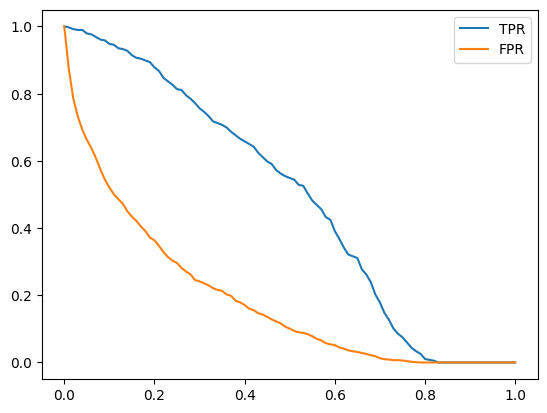

In [47]:
plt.plot(df_scores.thresholds, df_scores['tpr'], label='TPR')
plt.plot(df_scores.thresholds, df_scores['fpr'], label='FPR')
plt.legend()

### Random model

In [48]:
np.random.seed(1)
y_rand = np.random.uniform(0,1, size=len(y_val))

In [50]:
((y_rand >= 0.5) == y_val).mean()

np.float64(0.5017743080198722)

In [51]:
def tpr_fpr_dataframe(y_val, y_pred):
    thresholds = np.linspace(0,1,101)

    scores = []

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
    
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
    
        true_positive = (predict_positive & actual_positive).sum()
        true_negative = (predict_negative & actual_negative).sum()
    
        false_positive = (predict_positive & actual_negative).sum()
        false_negative = (predict_negative & actual_positive).sum()
    
        scores.append((t, true_positive, false_positive, false_negative, true_negative))

    columns = ['thresholds', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    df_scores['tpr'] = df_scores.tp / (df_scores.tp+df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

    return df_scores

In [53]:
df_random = tpr_fpr_dataframe(y_val, y_rand)
df_random[::10]

,thresholds,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,347,923,39,100,0.898964,0.902248
20,0.2,307,822,79,201,0.795337,0.803519
30,0.3,276,724,110,299,0.715026,0.707722
40,0.4,237,624,149,399,0.613990,0.609971
50,0.5,202,518,184,505,0.523316,0.506354
60,0.6,161,409,225,614,0.417098,0.399804
70,0.7,121,302,265,721,0.313472,0.295210
80,0.8,78,206,308,817,0.202073,0.201369
90,0.9,40,101,346,922,0.103627,0.098729


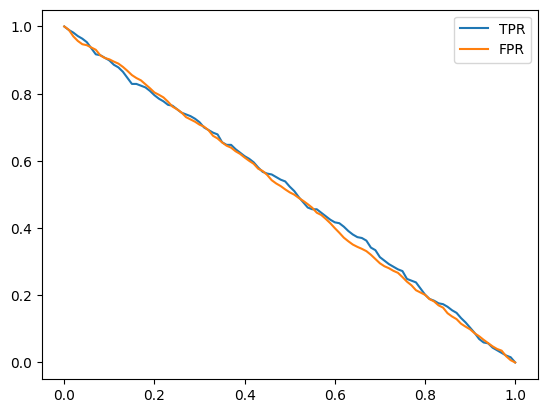

In [54]:
plt.plot(df_random.thresholds, df_random['tpr'], label='TPR')
plt.plot(df_random.thresholds, df_random['fpr'], label='FPR')
plt.legend()